In [1]:
# import libraries
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

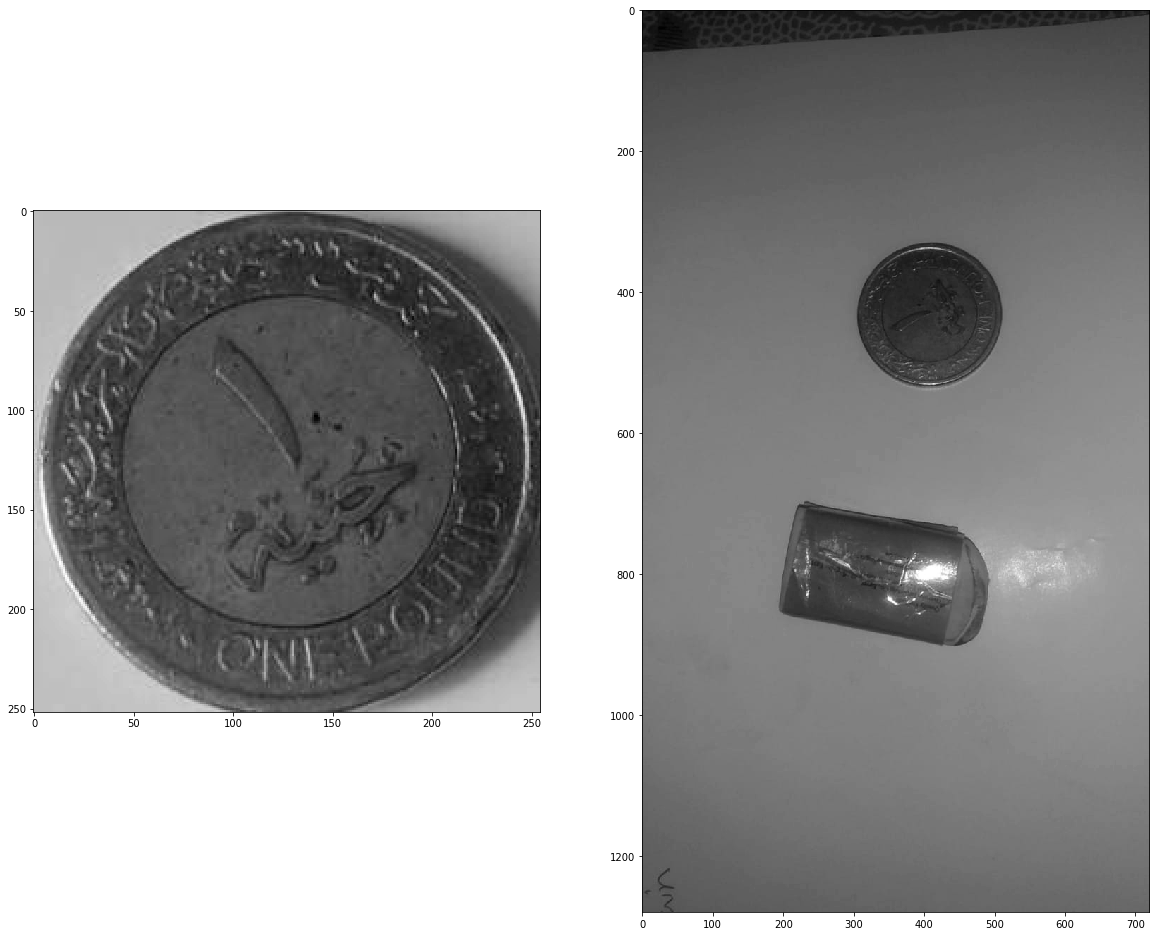

In [2]:
# read and plot images
img1=cv2.imread("Train.jpeg",0)
img2=cv2.imread("8.jpeg",0)

plt.figure(figsize=(20,20))



plt.subplot(1,2,1)
plt.imshow(img1,"gray")

plt.subplot(1,2,2)
plt.imshow(img2,"gray")

In [3]:
print("img1 shape => ",img1.shape)
print("------------------------------")
print("img2 shape => ",img2.shape)

img1 shape =>  (252, 255)
------------------------------
img2 shape =>  (1280, 720)


### Feature Extraction (SIFT)

In [4]:
#sift =cv.xfeatures2d.SIFT_create ( nfeatures =0, nOctaveLayers=3, contrastThreshold=0.04 , edgeThreshold=10 , sigma =1.6)
sift = cv2.xfeatures2d.SIFT_create()

In [5]:
#keypoints, descriptors=cv.Feature2D.detectAndCompute(image, mask, descriptors, useProvidedKeypoints)
kp1, dp1 = sift.detectAndCompute(img1, None)
kp2, dp2 = sift.detectAndCompute(img2, None)
print("Descriptor img1 = \n",dp1)
print("Descriptor shape  img1 => ",dp1.shape)
print("----------------------------------------------")
print("Descriptor img2 = \n",dp2)
print("Descriptor shape img2 => ",dp2.shape)

Descriptor img1 = 
 [[ 49.   2.   1. ...   0.   0.   1.]
 [110.  23.   0. ...   1.   1.   3.]
 [ 20.   9.   0. ...   1.   0.   4.]
 ...
 [  2.   1.   0. ...  34.   0.   1.]
 [  4.   2.   0. ...  40.   0.   2.]
 [  0.   0.   0. ...  59.   0.   3.]]
Descriptor shape  img1 =>  (284, 128)
----------------------------------------------
Descriptor img2 = 
 [[ 1.  3. 10. ...  0.  1. 20.]
 [ 6. 48. 17. ...  3.  2.  4.]
 [ 1.  0.  0. ... 11.  4.  0.]
 ...
 [ 4. 11.  5. ... 54. 29.  2.]
 [23. 17. 27. ...  6.  2.  6.]
 [ 7. 38. 34. ... 25.  9.  1.]]
Descriptor shape img2 =>  (311, 128)


##### Draw Keypoints

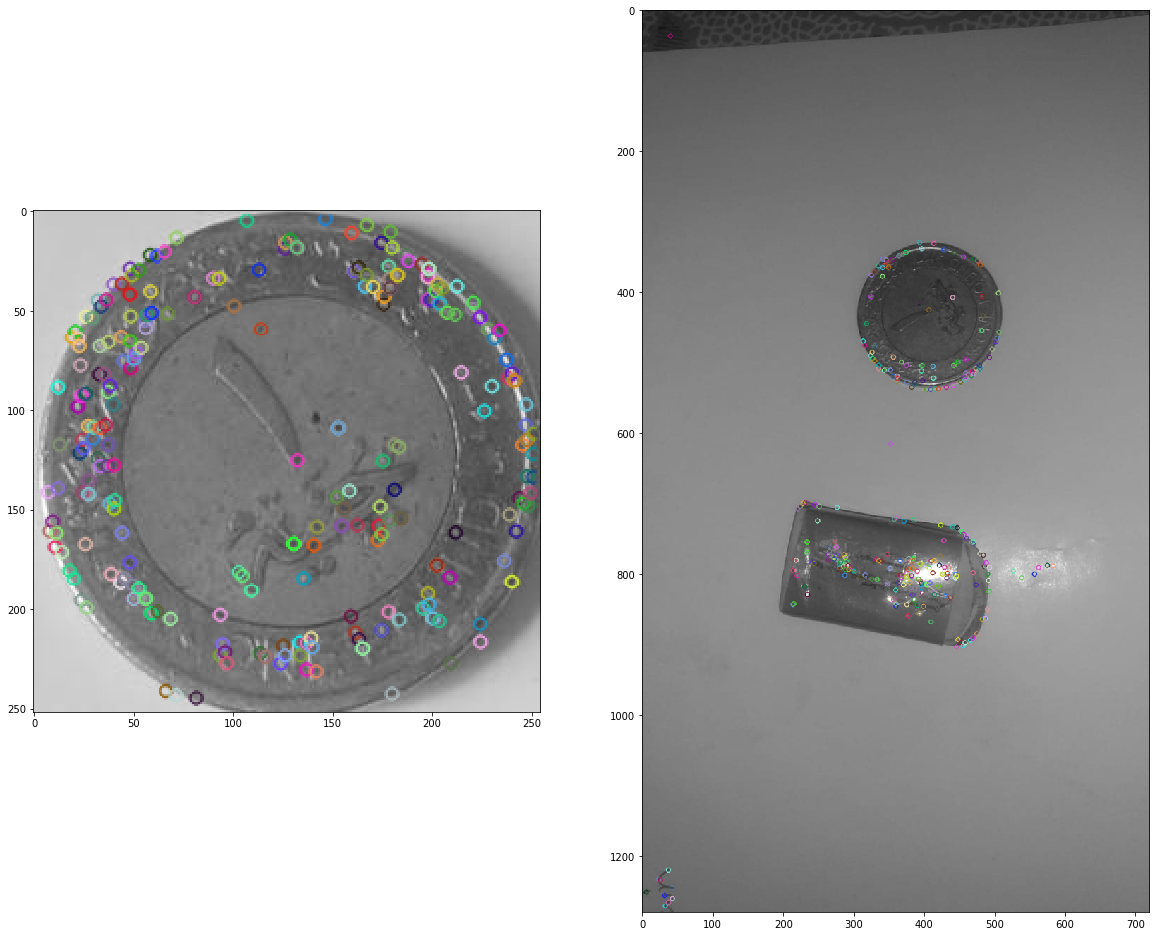

In [6]:
#outImage=cv.drawKeypoints(image,kp,outImage,color,flags)
img1=cv2.drawKeypoints(img1,kp1,img1)
img2=cv2.drawKeypoints(img2,kp2,img2)

plt.figure(figsize=(20,20))



plt.subplot(1,2,1)
plt.imshow(img1)

plt.subplot(1,2,2)
plt.imshow(img2)

##### Feature Matching

In [7]:
#Flann
FLANN_INDEX_LSH = 1
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [8]:
#matches = flann.knnMatch(descriptors1, descriptors2, k)
matches = flann.knnMatch(dp1, dp2, k=2)
len(matches)

284

In [9]:
for m,n in matches:
    print("m.distance = ",m.distance," n.distance = ",n.distance)

m.distance =  175.3140106201172  n.distance =  176.37176513671875
m.distance =  129.63795471191406  n.distance =  147.1971435546875
m.distance =  169.51400756835938  n.distance =  180.52423095703125
m.distance =  142.1055908203125  n.distance =  145.3237762451172
m.distance =  143.9340057373047  n.distance =  147.64146423339844
m.distance =  117.23480987548828  n.distance =  144.7204132080078
m.distance =  311.41131591796875  n.distance =  328.78411865234375
m.distance =  124.10479736328125  n.distance =  157.27682495117188
m.distance =  160.2030029296875  n.distance =  174.3932342529297
m.distance =  160.63311767578125  n.distance =  173.2830047607422
m.distance =  113.57376098632812  n.distance =  133.9328155517578
m.distance =  160.6300048828125  n.distance =  171.37094116210938
m.distance =  83.6002426147461  n.distance =  91.42756652832031
m.distance =  297.90771484375  n.distance =  314.6776123046875
m.distance =  253.5330352783203  n.distance =  264.5486755371094
m.distance =  1

In [10]:
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)
len(good)       
#img3 = cv2.drawMatches(img,kp1,train_img,kp2,good,None,flags=2)
#plt.figure(figsize=(20,20))
#plt.imshow(img3)

10

### Homography

In [11]:
#cv.FindHomography(srcPoints, dstPoints, method=0, ransacReprojThreshold=3.0)
query_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)

train_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 1.0)

matches_mask = mask.ravel().tolist()

In [12]:
print("matrix shape => ",matrix.shape)
print("------------------------------")
print("matrix \n",matrix)
print("------------------------------")
print("mask shape => ",mask.shape)
print("------------------------------")
print("len (matches_mask) => ",len(matches_mask))
print("------------------------------")
print("matches_mask \n",matches_mask)

matrix shape =>  (3, 3)
------------------------------
matrix 
 [[ 6.37436697e-02  6.38066820e-01  3.04877063e+02]
 [-8.22221651e-01  2.69420561e-02  5.16063367e+02]
 [-1.60958381e-04 -1.74229680e-04  1.00000000e+00]]
------------------------------
mask shape =>  (10, 1)
------------------------------
len (matches_mask) =>  10
------------------------------
matches_mask 
 [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]


In [13]:
print("------------------------------")
print("number ot outliers = ", matches_mask.count(0))
print("------------------------------")
print("number ot inliers = ", matches_mask.count(1))

------------------------------
number ot outliers =  5
------------------------------
number ot inliers =  5


# Perspective

In [14]:
h, w ,channel= img1.shape
pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
print("pts shape => ",pts.shape)
print("------------------------------")
print("pts \n",pts)
print("------------------------------")

pts shape =>  (4, 1, 2)
------------------------------
pts 
 [[[  0.   0.]]

 [[  0. 252.]]

 [[255. 252.]]

 [[255.   0.]]]
------------------------------


#### cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])


In [15]:
#train_img = cv2.warpPerspective(train_img, matrix,(img1.shape[1], img1.shape[0]))
dst = cv2.perspectiveTransform(pts, matrix)
print("dst shape => ",dst.shape)
print("------------------------------")
print("dst \n",dst)
print("------------------------------")

dst shape =>  (4, 1, 2)
------------------------------
dst 
 [[[304.87708 516.06335]]

 [[487.05444 546.8633 ]]

 [[526.66486 342.26144]]

 [[334.8765  319.511  ]]]
------------------------------


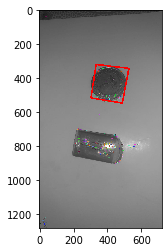

In [16]:
homography = cv2.polylines(img2, [np.int32(dst)], True, (255, 0, 0), 7)
plt.imshow(homography)

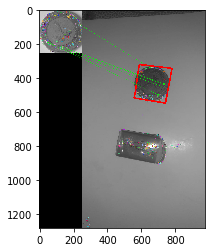

In [17]:
draw_params = dict( matchColor = (0,255,0),# draw matches in green color
                   singlePointColor = None,
                   matchesMask = matches_mask, # draw only inliers
                   flags = 2)

img4 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img4, 'gray')